<a href="https://colab.research.google.com/github/sheikh495/database/blob/main/M10_9_Coding_Assignment_PythonandSQLiteIntegration_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The general structure you will follow will be:

1. Open a connection to a database at the beginning.

2. Pass the connection object as an argument to each of the functions.

3. Close the connection after all functions have completed their work.

# Step 1: Set Up the Database
1. Use the SQLite Tutorial Sample DatabaseLinks to an external site. (chinook.db database file) for this assignment, which contains pre-existing tables such as employees, customers, and invoices.
2. Download the SQLite sample database from SQLite Tutorial Sample DatabaseLinks to an external site..

3. Upload the chinook.db file to your Colab environment and establish a connection to the database.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving chinook.db to chinook.db


# Step 2: Connecting to the Database

In [ ]:
import sqlite3

# Path to the uploaded chinook.db file
db_path = "/content/chinook.db"

# Establish a connection to the SQLite database
conn = sqlite3.connect(db_path)

# Test the connection by fetching some data (e.g., from the 'employees' table)
query = "SELECT * FROM employees LIMIT 5"
result = conn.execute(query).fetchall()

# Display the result
for row in result:
    print(row)

# Close the connection
conn.close()


(1, 'Adams', 'Andrew', 'General Manager', None, '1962-02-18 00:00:00', '2002-08-14 00:00:00', '11120 Jasper Ave NW', 'Edmonton', 'AB', 'Canada', 'T5K 2N1', '+1 (780) 428-9482', '+1 (780) 428-3457', 'andrew@chinookcorp.com')
(2, 'Edwards', 'Nancy', 'Sales Manager', 1, '1958-12-08 00:00:00', '2002-05-01 00:00:00', '825 8 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 2T3', '+1 (403) 262-3443', '+1 (403) 262-3322', 'nancy@chinookcorp.com')
(3, 'Peacock', 'Jane', 'Sales Support Agent', 2, '1973-08-29 00:00:00', '2002-04-01 00:00:00', '1111 6 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 5M5', '+1 (403) 262-3443', '+1 (403) 262-6712', 'jane@chinookcorp.com')
(4, 'Park', 'Margaret', 'Sales Support Agent', 2, '1947-09-19 00:00:00', '2003-05-03 00:00:00', '683 10 Street SW', 'Calgary', 'AB', 'Canada', 'T2P 5G3', '+1 (403) 263-4423', '+1 (403) 263-4289', 'margaret@chinookcorp.com')
(5, 'Johnson', 'Steve', 'Sales Support Agent', 2, '1965-03-03 00:00:00', '2003-10-17 00:00:00', '7727B 41 Ave', 'Calgary', 'A

@ ER

In [ ]:
!pip install eralchemy


In [ ]:
import eralchemy

# Path to the uploaded chinook.db file
db_path = "/content/chinook.db"

# Path to save the ER diagram
output_path = "/content/chinook_diagram.png"

# Generate the ER diagram and save it to a file
eralchemy.render_er(f"sqlite:///{db_path}", output_path)

print(f"ER diagram saved to {output_path}")


ER diagram saved to /content/chinook_diagram.png


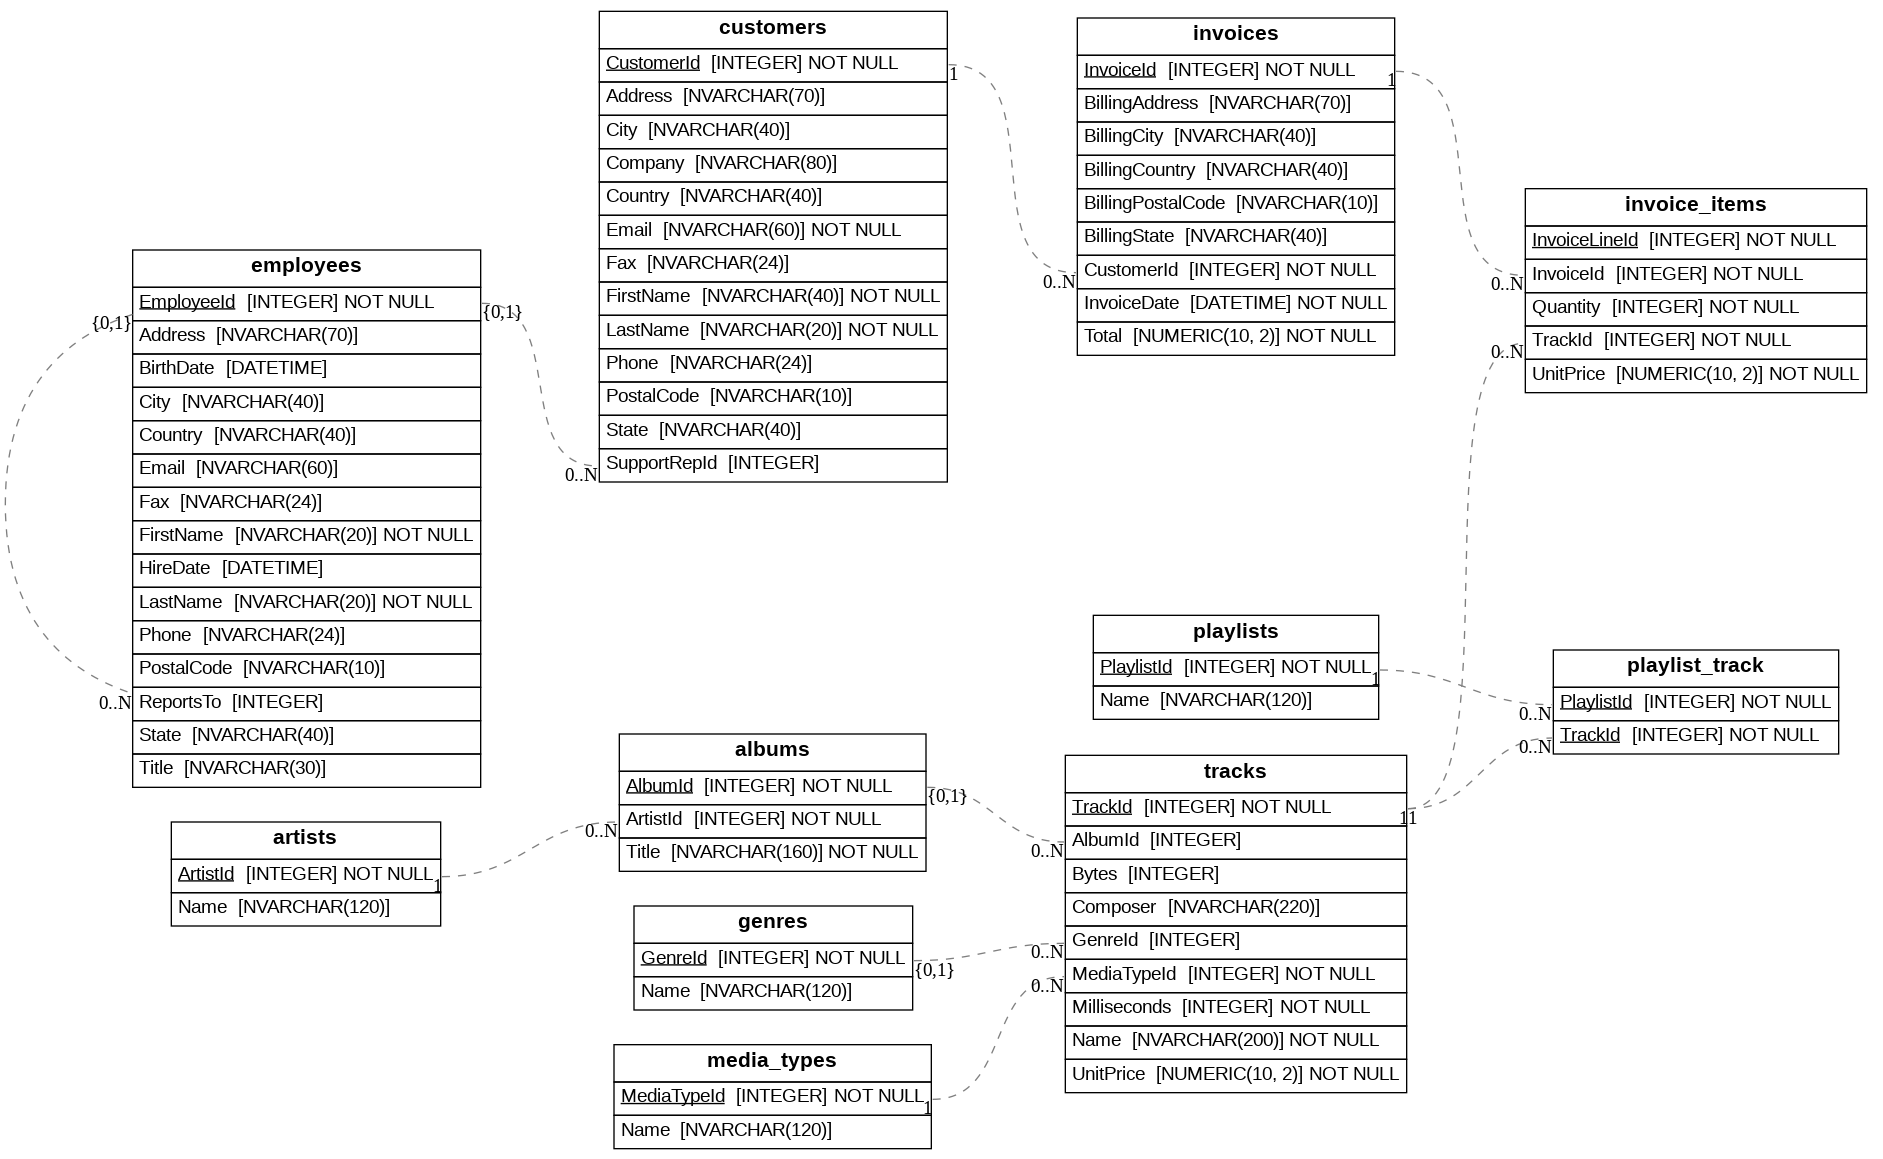

In [ ]:
from IPython.display import Image

# Display the ER diagram
Image(output_path)


In [ ]:
import sqlite3
import pandas as pd

# Path to the uploaded chinook.db file
db_path = "/content/chinook.db"

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Step 1: Query the foreign keys relationships
cursor = conn.cursor()

# Get foreign key information
cursor.execute("PRAGMA foreign_key_list('invoices')")
invoices_fk = cursor.fetchall()

cursor.execute("PRAGMA foreign_key_list('employees')")
employees_fk = cursor.fetchall()

cursor.execute("PRAGMA foreign_key_list('customers')")
customers_fk = cursor.fetchall()

cursor.execute("PRAGMA foreign_key_list('tracks')")
tracks_fk = cursor.fetchall()

# Step 2: Display relationships
def display_fk_info(fk_list, table_name):
    print(f"\nForeign keys in {table_name} table:")
    for fk in fk_list:
        print(f"  - From column {fk[3]} to table {fk[2]} on column {fk[4]}")

display_fk_info(invoices_fk, "invoices")
display_fk_info(employees_fk, "employees")
display_fk_info(customers_fk, "customers")
display_fk_info(tracks_fk, "tracks")

# Close the connection
conn.close()



Foreign keys in invoices table:
  - From column CustomerId to table customers on column CustomerId

Foreign keys in employees table:
  - From column ReportsTo to table employees on column EmployeeId

Foreign keys in customers table:
  - From column SupportRepId to table employees on column EmployeeId

Foreign keys in tracks table:
  - From column MediaTypeId to table media_types on column MediaTypeId
  - From column GenreId to table genres on column GenreId
  - From column AlbumId to table albums on column AlbumId


In [ ]:
from graphviz import Digraph

# Create a directed graph
dot = Digraph()

# Add nodes (tables)
dot.node('Invoices', 'Invoices')
dot.node('Customers', 'Customers')
dot.node('Employees', 'Employees')
dot.node('Tracks', 'Tracks')

# Add edges (relationships)
dot.edge('Invoices', 'Customers', label='CustomerId')
dot.edge('Invoices', 'Employees', label='EmployeeId')
dot.edge('Tracks', 'Albums', label='AlbumId')
dot.edge('Tracks', 'MediaTypes', label='MediaTypeId')

# Visualize the relationship graph
dot.render('/content/chinook_relationships', format='png', view=True)


'/content/chinook_relationships.png'

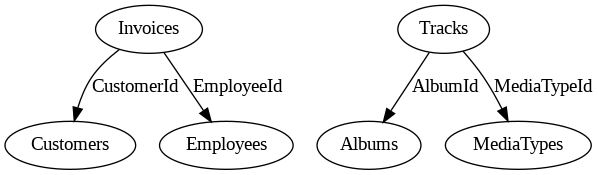

In [ ]:
from IPython.display import Image

# Display the generated ER diagram image
Image('/content/chinook_relationships.png')


In [ ]:
# Import necessary libraries
import sqlite3
import pandas as pd

# Path to the uploaded chinook.db file
db_path = "/content/chinook.db"

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Get the list of table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# For each table, retrieve and display its contents
for table in tables:
    table_name = table[0]
    print(f"\nDisplaying data for table: {table_name}\n")
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, conn)
    display(df)  # Use display() to show tables in Colab

# Close the connection
conn.close()



Displaying data for table: albums



,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274



Displaying data for table: sqlite_sequence



,name,seq
0,genres,25
1,media_types,5
2,artists,275
3,albums,347
4,tracks,3503
5,employees,8
6,customers,59
7,invoices,412
8,invoice_items,2240
9,playlists,18



Displaying data for table: artists



,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble



Displaying data for table: customers



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4



Displaying data for table: employees



,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com



Displaying data for table: genres



,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack



Displaying data for table: invoices



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86



Displaying data for table: invoice_items



,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
...,...,...,...,...,...
2235,2236,411,3136,0.99,1
2236,2237,411,3145,0.99,1
2237,2238,411,3154,0.99,1
2238,2239,411,3163,0.99,1



Displaying data for table: media_types



,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file



Displaying data for table: playlists



,PlaylistId,Name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music
5,6,Audiobooks
6,7,Movies
7,8,Music
8,9,Music Videos
9,10,TV Shows



Displaying data for table: playlist_track



,PlaylistId,TrackId
0,1,3402
1,1,3389
2,1,3390
3,1,3391
4,1,3392
...,...,...
8710,17,2094
8711,17,2095
8712,17,2096
8713,17,3290



Displaying data for table: tracks



,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99



Displaying data for table: sqlite_stat1



,tbl,idx,stat
0,tracks,IFK_TrackMediaTypeId,3503 701
1,tracks,IFK_TrackGenreId,3503 141
2,tracks,IFK_TrackAlbumId,3503 11
3,playlist_track,IFK_PlaylistTrackTrackId,8715 3
4,playlist_track,sqlite_autoindex_playlist_track_1,8715 623 1
5,albums,IFK_AlbumArtistId,347 2
6,artists,None,275
7,customers,IFK_CustomerSupportRepId,59 20
8,playlists,None,18
9,employees,IFK_EmployeeReportsTo,8 2


# Read Records

Write a function called view_all_employees(conn) that retrieves and prints all the records in the employees table.

In [ ]:
import sqlite3

# Function to view all employees
def view_all_employees(conn):
    try:
        cursor = conn.cursor()
        # Query to select all records from the employees table
        query = "SELECT * FROM employees"
        cursor.execute(query)
        rows = cursor.fetchall()

        print("All employees:")
        # Print each row in the employees table
        for row in rows:
            print(row)

    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Connect to the database
db_path = "/content/chinook.db"  # Path to your chinook.db file in Google Colab
conn = sqlite3.connect(db_path)

# Test: View all employees
view_all_employees(conn)

# Close the connection
conn.close()


All employees:
(1, 'Adams', 'Andrew', 'General Manager', None, '1962-02-18 00:00:00', '2002-08-14 00:00:00', '11120 Jasper Ave NW', 'Edmonton', 'AB', 'Canada', 'T5K 2N1', '+1 (780) 428-9482', '+1 (780) 428-3457', 'andrew@chinookcorp.com')
(2, 'Edwards', 'Nancy', 'Sales Manager', 1, '1958-12-08 00:00:00', '2002-05-01 00:00:00', '825 8 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 2T3', '+1 (403) 262-3443', '+1 (403) 262-3322', 'nancy@chinookcorp.com')
(3, 'Peacock', 'Jane', 'Sales Support Agent', 2, '1973-08-29 00:00:00', '2002-04-01 00:00:00', '1111 6 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 5M5', '+1 (403) 262-3443', '+1 (403) 262-6712', 'jane@chinookcorp.com')
(4, 'Park', 'Margaret', 'Sales Support Agent', 2, '1947-09-19 00:00:00', '2003-05-03 00:00:00', '683 10 Street SW', 'Calgary', 'AB', 'Canada', 'T2P 5G3', '+1 (403) 263-4423', '+1 (403) 263-4289', 'margaret@chinookcorp.com')
(5, 'Johnson', 'Steve', 'Sales Support Agent', 2, '1965-03-03 00:00:00', '2003-10-17 00:00:00', '7727B 41 Ave'

Write another function called view_employee_by_title(conn, title) that retrieves and prints all employees with a specific title (e.g., "Sales Support Agent")

In [ ]:
import sqlite3

# Function to view employees by title
def view_employee_by_title(conn, title):
    try:
        cursor = conn.cursor()
        # Query to select employees with a specific title
        query = "SELECT * FROM employees WHERE Title = ?"
        cursor.execute(query, (title,))
        rows = cursor.fetchall()

        print(f"Employees with title '{title}':")
        if rows:
            # Print each row of the employees with the given title
            for row in rows:
                print(row)
        else:
            print("No employees found with the specified title.")

    except sqlite3.Error as e:
        print(f"Error retrieving employees by title: {e}")

# Connect to the database
db_path = "/content/chinook.db"  # Path to your chinook.db file in Google Colab
conn = sqlite3.connect(db_path)

# Test: View employees by title (e.g., "Sales Support Agent")
view_employee_by_title(conn, "Sales Support Agent")

# Close the connection
conn.close()


Employees with title 'Sales Support Agent':
(3, 'Peacock', 'Jane', 'Sales Support Agent', 2, '1973-08-29 00:00:00', '2002-04-01 00:00:00', '1111 6 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 5M5', '+1 (403) 262-3443', '+1 (403) 262-6712', 'jane@chinookcorp.com')
(4, 'Park', 'Margaret', 'Sales Support Agent', 2, '1947-09-19 00:00:00', '2003-05-03 00:00:00', '683 10 Street SW', 'Calgary', 'AB', 'Canada', 'T2P 5G3', '+1 (403) 263-4423', '+1 (403) 263-4289', 'margaret@chinookcorp.com')
(5, 'Johnson', 'Steve', 'Sales Support Agent', 2, '1965-03-03 00:00:00', '2003-10-17 00:00:00', '7727B 41 Ave', 'Calgary', 'AB', 'Canada', 'T3B 1Y7', '1 (780) 836-9987', '1 (780) 836-9543', 'steve@chinookcorp.com')


# Step 4: Create Records

Write a function called add_employee(conn, employee_data) that inserts new records into the employees table.

In [ ]:
import sqlite3

# Function to add a new employee
def add_employee(conn, employee_data):
    try:
        cursor = conn.cursor()

        # SQL query to insert a new employee
        query = """
        INSERT INTO employees (FirstName, LastName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """

        # Execute the query with the provided employee_data
        cursor.execute(query, employee_data)
        conn.commit()

        print("Employee added successfully!")

    except sqlite3.Error as e:
        print(f"Error adding employee: {e}")

# Example employee data to be added
employee_data = ('John', 'Doe', 'Sales Support Agent', 2, '1985-06-15', '2022-01-01', '1234 Main St', 'Seattle', 'WA', 'USA', '98101', '(206) 555-1234', None, 'johndoe@company.com')

# Connect to the database
db_path = "/content/chinook.db"  # Path to your chinook.db file in Google Colab
conn = sqlite3.connect(db_path)

# Call the function to add a new employee
add_employee(conn, employee_data)

# Close the connection
conn.close()


Employee added successfully!


Add at least one new employee to the table. Use parameterized queries to avoid SQL injection attacks.

In [ ]:
def view_all_employees(conn):
    try:
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM employees")
        rows = cursor.fetchall()
        for row in rows:
            print(row)
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# View all employees
conn = sqlite3.connect(db_path)
view_all_employees(conn)
conn.close()


(1, 'Adams', 'Andrew', 'General Manager', None, '1962-02-18 00:00:00', '2002-08-14 00:00:00', '11120 Jasper Ave NW', 'Edmonton', 'AB', 'Canada', 'T5K 2N1', '+1 (780) 428-9482', '+1 (780) 428-3457', 'andrew@chinookcorp.com')
(2, 'Edwards', 'Nancy', 'Sales Manager', 1, '1958-12-08 00:00:00', '2002-05-01 00:00:00', '825 8 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 2T3', '+1 (403) 262-3443', '+1 (403) 262-3322', 'nancy@chinookcorp.com')
(3, 'Peacock', 'Jane', 'Sales Support Agent', 2, '1973-08-29 00:00:00', '2002-04-01 00:00:00', '1111 6 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 5M5', '+1 (403) 262-3443', '+1 (403) 262-6712', 'jane@chinookcorp.com')
(4, 'Park', 'Margaret', 'Sales Support Agent', 2, '1947-09-19 00:00:00', '2003-05-03 00:00:00', '683 10 Street SW', 'Calgary', 'AB', 'Canada', 'T2P 5G3', '+1 (403) 263-4423', '+1 (403) 263-4289', 'margaret@chinookcorp.com')
(5, 'Johnson', 'Steve', 'Sales Support Agent', 2, '1965-03-03 00:00:00', '2003-10-17 00:00:00', '7727B 41 Ave', 'Calgary', 'A

# FINAL

In [ ]:
import sqlite3

# Step 4: Function to add a new employee
def add_employee(conn, employee_data):
    try:
        cursor = conn.cursor()

        # SQL query to insert a new employee
        query = """
        INSERT INTO employees (FirstName, LastName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """

        # Execute the query with the provided employee_data
        cursor.execute(query, employee_data)
        conn.commit()

        print("Employee added successfully!")

    except sqlite3.Error as e:
        print(f"Error adding employee: {e}")

# Function to view all employees
def view_all_employees(conn):
    try:
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM employees")
        rows = cursor.fetchall()
        for row in rows:
            print(row)
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Step 5: Function to update an employee's job title
def update_employee_title(conn, employee_id, new_title):
    try:
        cursor = conn.cursor()

        # SQL query to update the employee's title
        query = """
        UPDATE employees
        SET Title = ?
        WHERE EmployeeID = ?
        """

        # Execute the query with the employee ID and new title
        cursor.execute(query, (new_title, employee_id))
        conn.commit()

        print(f"Employee {employee_id}'s title updated to {new_title}.")

    except sqlite3.Error as e:
        print(f"Error updating employee title: {e}")

# Connect to the database
db_path = "/content/chinook.db"  # Path to your chinook.db file in Google Colab
conn = sqlite3.connect(db_path)

# Step 4: Add a new employee to the database
employee_data = ('John', 'Doe', 'Sales Representative', 3, '1995-03-15', '2023-03-01', '1234 Elm St', 'Seattle', 'WA', 'USA', '98101', '(206) 555-1234', None, 'johndoe@company.com')
add_employee(conn, employee_data)

# Verify that the employee was added
print("\nAll Employees After Adding:")
view_all_employees(conn)

# Step 5: Update the job title of the newly added employee (let's assume their EmployeeID is 1001)
update_employee_title(conn, 1001, "Senior Sales Representative")

# Verify that the employee's title was updated
print("\nAll Employees After Title Update:")
view_all_employees(conn)

# Close the connection
conn.close()


Employee added successfully!

All Employees After Adding:
(1, 'Adams', 'Andrew', 'General Manager', None, '1962-02-18 00:00:00', '2002-08-14 00:00:00', '11120 Jasper Ave NW', 'Edmonton', 'AB', 'Canada', 'T5K 2N1', '+1 (780) 428-9482', '+1 (780) 428-3457', 'andrew@chinookcorp.com')
(2, 'Edwards', 'Nancy', 'Sales Manager', 1, '1958-12-08 00:00:00', '2002-05-01 00:00:00', '825 8 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 2T3', '+1 (403) 262-3443', '+1 (403) 262-3322', 'nancy@chinookcorp.com')
(3, 'Peacock', 'Jane', 'Sales Support Agent', 2, '1973-08-29 00:00:00', '2002-04-01 00:00:00', '1111 6 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 5M5', '+1 (403) 262-3443', '+1 (403) 262-6712', 'jane@chinookcorp.com')
(4, 'Park', 'Margaret', 'Sales Support Agent', 2, '1947-09-19 00:00:00', '2003-05-03 00:00:00', '683 10 Street SW', 'Calgary', 'AB', 'Canada', 'T2P 5G3', '+1 (403) 263-4423', '+1 (403) 263-4289', 'margaret@chinookcorp.com')
(5, 'Johnson', 'Steve', 'Sales Support Agent', 2, '1965-03-03 00:00

In [ ]:
import sqlite3
import pandas as pd

# Function to view all employees as a table
def view_all_employees(conn):
    try:
        # Query to select all employees from the employees table
        query = "SELECT * FROM employees"

        # Use pandas to read the SQL query result into a DataFrame
        df = pd.read_sql_query(query, conn)

        # Display the DataFrame as a table
        return df

    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Connect to the database
db_path = "/content/chinook.db"  # Path to your chinook.db file in Google Colab
conn = sqlite3.connect(db_path)

# View all employees in the database as a table
employee_data = view_all_employees(conn)
print(employee_data)  # Display the table

# Close the connection
conn.close()


   EmployeeId  LastName FirstName                 Title  ReportsTo  \
0           1     Adams    Andrew       General Manager        NaN   
1           2   Edwards     Nancy         Sales Manager        1.0   
2           3   Peacock      Jane   Sales Support Agent        2.0   
3           4      Park  Margaret   Sales Support Agent        2.0   
4           5   Johnson     Steve   Sales Support Agent        2.0   
5           6  Mitchell   Michael            IT Manager        1.0   
6           7      King    Robert              IT Staff        6.0   
7           8  Callahan     Laura              IT Staff        6.0   
8           9       Doe      John   Sales Support Agent        2.0   
9          10       Doe      John  Sales Representative        3.0   

             BirthDate             HireDate                      Address  \
0  1962-02-18 00:00:00  2002-08-14 00:00:00          11120 Jasper Ave NW   
1  1958-12-08 00:00:00  2002-05-01 00:00:00                 825 8 Ave SW   
2

# Step 5: Update Records

In [ ]:
import sqlite3
import pandas as pd

# Function to view all employees as a table
def view_all_employees(conn):
    try:
        # Query to select all employees from the employees table
        query = "SELECT * FROM employees"

        # Use pandas to read the SQL query result into a DataFrame
        df = pd.read_sql_query(query, conn)

        # Return the DataFrame
        return df

    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Function to update employee title
def update_employee_title(conn, employee_id, new_title):
    try:
        # SQL query to update the title of a specific employee
        query = "UPDATE employees SET Title = ? WHERE EmployeeID = ?"

        # Execute the query with parameters
        conn.execute(query, (new_title, employee_id))

        # Commit the transaction to save the changes
        conn.commit()

        print(f"Employee ID {employee_id} title updated to '{new_title}' successfully!")

    except sqlite3.Error as e:
        print(f"Error updating employee title: {e}")

# Connect to the database
db_path = "/content/chinook.db"  # Path to your chinook.db file in Google Colab
conn = sqlite3.connect(db_path)

# View all employees before update
print("Employees before update:")
employee_data_before = view_all_employees(conn)
print(employee_data_before)

# Test: Update the title of employee with ID 2 to 'Senior Sales Support Agent'
update_employee_title(conn, 2, 'Senior Sales Support Agent')

# View all employees after update
print("\nEmployees after update:")
employee_data_after = view_all_employees(conn)
print(employee_data_after)

# Close the connection
conn.close()


Employees before update:
    EmployeeId  LastName FirstName                 Title  ReportsTo  \
0            1     Adams    Andrew       General Manager        NaN   
1            2   Edwards     Nancy         Sales Manager        1.0   
2            3   Peacock      Jane   Sales Support Agent        2.0   
3            4      Park  Margaret   Sales Support Agent        2.0   
4            5   Johnson     Steve   Sales Support Agent        2.0   
5            6  Mitchell   Michael            IT Manager        1.0   
6            7      King    Robert              IT Staff        6.0   
7            8  Callahan     Laura              IT Staff        6.0   
8            9       Doe      John   Sales Support Agent        2.0   
9           10       Doe      John  Sales Representative        3.0   
10          11       Doe      John   Sales Support Agent        1.0   
11          12       Doe      John   Sales Support Agent        1.0   

              BirthDate             HireDate       

# Delete Records

In [ ]:
import sqlite3
import pandas as pd

# Function to view all employees as a table
def view_all_employees(conn):
    try:
        # Query to select all employees from the employees table
        query = "SELECT * FROM employees"

        # Use pandas to read the SQL query result into a DataFrame
        df = pd.read_sql_query(query, conn)

        # Return the DataFrame
        return df

    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Function to delete employee by ID
def delete_employee(conn, employee_id):
    try:
        # SQL query to delete an employee by EmployeeID
        query = "DELETE FROM employees WHERE EmployeeID = ?"

        # Execute the query with the given employee_id
        conn.execute(query, (employee_id,))

        # Commit the transaction to save the changes
        conn.commit()

        print(f"Employee ID {employee_id} deleted successfully!")

    except sqlite3.Error as e:
        print(f"Error deleting employee: {e}")

# Connect to the database
db_path = "/content/chinook.db"  # Path to your chinook.db file in Google Colab
conn = sqlite3.connect(db_path)

# View all employees before deletion
print("Employees before deletion:")
employee_data_before = view_all_employees(conn)
print(employee_data_before)

# Test: Delete the employee with ID 3
delete_employee(conn, 3)

# View all employees after deletion
print("\nEmployees after deletion:")
employee_data_after = view_all_employees(conn)
print(employee_data_after)

# Close the connection
conn.close()


Employees before deletion:
    EmployeeId  LastName FirstName                       Title  ReportsTo  \
0            1     Adams    Andrew             General Manager        NaN   
1            2   Edwards     Nancy  Senior Sales Support Agent        1.0   
2            3   Peacock      Jane         Sales Support Agent        2.0   
3            4      Park  Margaret         Sales Support Agent        2.0   
4            5   Johnson     Steve         Sales Support Agent        2.0   
5            6  Mitchell   Michael                  IT Manager        1.0   
6            7      King    Robert                    IT Staff        6.0   
7            8  Callahan     Laura                    IT Staff        6.0   
8            9       Doe      John         Sales Support Agent        2.0   
9           10       Doe      John        Sales Representative        3.0   
10          11       Doe      John         Sales Support Agent        1.0   
11          12       Doe      John         Sales 

# 7

In [ ]:
import sqlite3
import pandas as pd

# Function to view all employees as a table
def view_all_employees(conn):
    try:
        # Query to select all employees from the employees table
        query = "SELECT * FROM employees"

        # Use pandas to read the SQL query result into a DataFrame
        df = pd.read_sql_query(query, conn)

        # Return the DataFrame
        return df

    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Function to delete employee by ID
def delete_employee(conn, employee_id):
    try:
        # SQL query to delete an employee by EmployeeID
        query = "DELETE FROM employees WHERE EmployeeID = ?"

        # Execute the query with the given employee_id
        conn.execute(query, (employee_id,))

        # Commit the transaction to save the changes
        conn.commit()

        print(f"Employee ID {employee_id} deleted successfully!")

    except sqlite3.Error as e:
        print(f"Error deleting employee: {e}")

# Connect to the database
db_path = "/content/chinook.db"  # Path to your chinook.db file in Google Colab
conn = sqlite3.connect(db_path)

try:
    # View all employees before deletion
    print("Employees before deletion:")
    employee_data_before = view_all_employees(conn)
    print(employee_data_before)

    # Test: Delete the employee with ID 3
    delete_employee(conn, 3)

    # View all employees after deletion
    print("\nEmployees after deletion:")
    employee_data_after = view_all_employees(conn)
    print(employee_data_after)

finally:
    # Ensure the connection is closed properly
    conn.close()
    print("\nDatabase connection closed.")


Employees before deletion:
    EmployeeId  LastName FirstName                       Title  ReportsTo  \
0            1     Adams    Andrew             General Manager        NaN   
1            2   Edwards     Nancy  Senior Sales Support Agent        1.0   
2            4      Park  Margaret         Sales Support Agent        2.0   
3            5   Johnson     Steve         Sales Support Agent        2.0   
4            6  Mitchell   Michael                  IT Manager        1.0   
5            7      King    Robert                    IT Staff        6.0   
6            8  Callahan     Laura                    IT Staff        6.0   
7            9       Doe      John         Sales Support Agent        2.0   
8           10       Doe      John        Sales Representative        3.0   
9           11       Doe      John         Sales Support Agent        1.0   
10          12       Doe      John         Sales Support Agent        1.0   

              BirthDate             HireDate    

# OR

In [ ]:
import sqlite3
import pandas as pd
from google.colab import files

# Step 1: Upload the chinook.db file
uploaded = files.upload()  # Upload the chinook.db file

# Step 2: Connect to the database
def connect_to_db(db_path):
    try:
        conn = sqlite3.connect(db_path)
        print("Connection successful!")
        return conn
    except sqlite3.Error as e:
        print(f"Error connecting to database: {e}")
        return None

# Step 3: Read Records
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

def view_employee_by_title(conn, title):
    try:
        query = "SELECT * FROM employees WHERE Title = ?"
        df = pd.read_sql_query(query, conn, params=(title,))
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees by title: {e}")

# Step 4: Create Records
def add_employee(conn, employee_data):
    try:
        query = """
        INSERT INTO employees (FirstName, LastName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """
        conn.execute(query, employee_data)
        conn.commit()
        print("Employee added successfully!")
    except sqlite3.Error as e:
        print(f"Error adding employee: {e}")

# Step 5: Update Records
def update_employee_title(conn, employee_id, new_title):
    try:
        query = "UPDATE employees SET Title = ? WHERE EmployeeID = ?"
        conn.execute(query, (new_title, employee_id))
        conn.commit()
        print(f"Employee ID {employee_id} title updated to {new_title}")
    except sqlite3.Error as e:
        print(f"Error updating employee title: {e}")

# Step 6: Delete Records
def delete_employee(conn, employee_id):
    try:
        query = "DELETE FROM employees WHERE EmployeeID = ?"
        conn.execute(query, (employee_id,))
        conn.commit()
        print(f"Employee ID {employee_id} deleted successfully!")
    except sqlite3.Error as e:
        print(f"Error deleting employee: {e}")

# Step 7: Close the connection
def close_connection(conn):
    if conn:
        conn.close()
        print("Database connection closed.")

# Main script
db_path = "/content/chinook.db"  # Replace with the path to your uploaded database
conn = connect_to_db(db_path)

# Example operations
if conn:
    # View all employees
    print(view_all_employees(conn))

    # Add new employee
    new_employee = ('John', 'Doe', 'Sales Support Agent', 2, '1985-07-15', '2024-11-01', '1234 Elm St', 'Some City', 'Some State', 'USA', '12345', '555-1234', '555-5678', 'johndoe@example.com')
    add_employee(conn, new_employee)

    # Update employee title
    update_employee_title(conn, 1, 'Senior Sales Agent')

    # Delete employee by ID
    delete_employee(conn, 3)

    # Close connection
    close_connection(conn)


Saving chinook.db to chinook (1).db
Connection successful!
    EmployeeId  LastName FirstName                       Title  ReportsTo  \
0            1     Adams    Andrew             General Manager        NaN   
1            2   Edwards     Nancy  Senior Sales Support Agent        1.0   
2            4      Park  Margaret         Sales Support Agent        2.0   
3            5   Johnson     Steve         Sales Support Agent        2.0   
4            6  Mitchell   Michael                  IT Manager        1.0   
5            7      King    Robert                    IT Staff        6.0   
6            8  Callahan     Laura                    IT Staff        6.0   
7            9       Doe      John         Sales Support Agent        2.0   
8           10       Doe      John        Sales Representative        3.0   
9           11       Doe      John         Sales Support Agent        1.0   
10          12       Doe      John         Sales Support Agent        1.0   

              Bi

#@ !1

In [ ]:
import sqlite3
import pandas as pd

# Step 1: Connect to the Database
def connect_to_db(db_path):
    try:
        conn = sqlite3.connect(db_path)
        print("Connection successful!")
        return conn
    except sqlite3.Error as e:
        print(f"Error connecting to database: {e}")
        return None

# Step 2: View all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql(query, conn)
        print("All employees:")
        print(df)
    except sqlite3.Error as e:
        print(f"Error reading data: {e}")

# Step 3: View employee by title
def view_employee_by_title(conn, title):
    try:
        query = "SELECT * FROM employees WHERE Title = ?"
        df = pd.read_sql(query, conn, params=(title,))
        print(f"Employees with title '{title}':")
        print(df)
    except sqlite3.Error as e:
        print(f"Error reading data: {e}")

# Step 4: Add an employee
def add_employee(conn, employee_data):
    try:
        query = '''INSERT INTO employees (FirstName, LastName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email)
                   VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''
        conn.execute(query, employee_data)
        conn.commit()
        print("Employee added successfully!")
    except sqlite3.Error as e:
        print(f"Error adding employee: {e}")

# Step 5: Update employee title
def update_employee_title(conn, employee_id, new_title):
    try:
        query = "UPDATE employees SET Title = ? WHERE EmployeeID = ?"
        conn.execute(query, (new_title, employee_id))
        conn.commit()
        print(f"Employee ID {employee_id} title updated to {new_title}")
    except sqlite3.Error as e:
        print(f"Error updating employee title: {e}")

# Step 6: Delete employee
def delete_employee(conn, employee_id):
    try:
        query = "DELETE FROM employees WHERE EmployeeID = ?"
        conn.execute(query, (employee_id,))
        conn.commit()
        print(f"Employee ID {employee_id} deleted successfully!")
    except sqlite3.Error as e:
        print(f"Error deleting employee: {e}")

# Step 7: Close the connection
def close_connection(conn):
    if conn:
        conn.close()
        print("Database connection closed.")

# Example usage:

# 1. Connect to the database
db_path = "/content/chinook.db"
conn = connect_to_db(db_path)

# 2. View all employees before adding a new one
view_all_employees(conn)

# 3. Add a new employee
employee_data = ('John', 'Doe', 'Sales Support Agent', 2, '1985-07-15', '2024-11-01', '1234 Elm St', 'Some City', 'Some State', 'USA', '12345', '555-1234', '555-5678', 'johndoe@example.com')
add_employee(conn, employee_data)

# 4. View all employees after adding the new employee
view_all_employees(conn)

# 5. Update the title of an existing employee (e.g., EmployeeID 1)
update_employee_title(conn, 1, 'Senior Sales Agent')

# 6. View all employees after title update
view_all_employees(conn)

# 7. Delete an employee (e.g., EmployeeID 3)
delete_employee(conn, 3)

# 8. View all employees after deletion
view_all_employees(conn)

# 9. Close the connection
close_connection(conn)


Connection successful!
All employees:
    EmployeeId  LastName FirstName                       Title  ReportsTo  \
0            1     Adams    Andrew          Senior Sales Agent        NaN   
1            2   Edwards     Nancy  Senior Sales Support Agent        1.0   
2            4      Park  Margaret         Sales Support Agent        2.0   
3            5   Johnson     Steve         Sales Support Agent        2.0   
4            6  Mitchell   Michael                  IT Manager        1.0   
5            7      King    Robert                    IT Staff        6.0   
6            8  Callahan     Laura                    IT Staff        6.0   
7            9       Doe      John         Sales Support Agent        2.0   
8           10       Doe      John        Sales Representative        3.0   
9           11       Doe      John         Sales Support Agent        1.0   
10          12       Doe      John         Sales Support Agent        1.0   
11          13       Doe      John    

#2

In [ ]:
import sqlite3
import pandas as pd

# Step 1: Connect to the Database
def connect_to_db(db_path):
    try:
        conn = sqlite3.connect(db_path)
        print("Connection successful!")
        return conn
    except sqlite3.Error as e:
        print(f"Error connecting to database: {e}")
        return None

# Step 2: View all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql(query, conn)
        print("All employees:")
        return df
    except sqlite3.Error as e:
        print(f"Error reading data: {e}")
        return None

# Step 3: View employee by title
def view_employee_by_title(conn, title):
    try:
        query = "SELECT * FROM employees WHERE Title = ?"
        df = pd.read_sql(query, conn, params=(title,))
        print(f"Employees with title '{title}':")
        return df
    except sqlite3.Error as e:
        print(f"Error reading data: {e}")
        return None

# Step 4: Add an employee
def add_employee(conn, employee_data):
    try:
        query = '''INSERT INTO employees (FirstName, LastName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email)
                   VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''
        conn.execute(query, employee_data)
        conn.commit()
        print("Employee added successfully!")
    except sqlite3.Error as e:
        print(f"Error adding employee: {e}")

# Step 5: Update employee title
def update_employee_title(conn, employee_id, new_title):
    try:
        query = "UPDATE employees SET Title = ? WHERE EmployeeID = ?"
        conn.execute(query, (new_title, employee_id))
        conn.commit()
        print(f"Employee ID {employee_id} title updated to {new_title}")
    except sqlite3.Error as e:
        print(f"Error updating employee title: {e}")

# Step 6: Delete employee
def delete_employee(conn, employee_id):
    try:
        query = "DELETE FROM employees WHERE EmployeeID = ?"
        conn.execute(query, (employee_id,))
        conn.commit()
        print(f"Employee ID {employee_id} deleted successfully!")
    except sqlite3.Error as e:
        print(f"Error deleting employee: {e}")

# Step 7: Close the connection
def close_connection(conn):
    if conn:
        conn.close()
        print("Database connection closed.")

# Example usage:

# 1. Connect to the database
db_path = "/content/chinook.db"
conn = connect_to_db(db_path)

# 2. View all employees before adding a new one
df_before = view_all_employees(conn)
print(df_before)

# 3. Add a new employee
employee_data = ('John', 'Doe', 'Sales Support Agent', 2, '1985-07-15', '2024-11-01', '1234 Elm St', 'Some City', 'Some State', 'USA', '12345', '555-1234', '555-5678', 'johndoe@example.com')
add_employee(conn, employee_data)

# 4. View all employees after adding the new employee
df_after_add = view_all_employees(conn)
print(df_after_add)

# 5. Update the title of an existing employee (e.g., EmployeeID 1)
update_employee_title(conn, 1, 'Senior Sales Agent')

# 6. View all employees after title update
df_after_update = view_all_employees(conn)
print(df_after_update)

# 7. Delete an employee (e.g., EmployeeID 3)
delete_employee(conn, 3)

# 8. View all employees after deletion
df_after_delete = view_all_employees(conn)
print(df_after_delete)

# 9. Close the connection
close_connection(conn)


Connection successful!
All employees:
    EmployeeId  LastName FirstName                       Title  ReportsTo  \
0            1     Adams    Andrew          Senior Sales Agent        NaN   
1            2   Edwards     Nancy  Senior Sales Support Agent        1.0   
2            4      Park  Margaret         Sales Support Agent        2.0   
3            5   Johnson     Steve         Sales Support Agent        2.0   
4            6  Mitchell   Michael                  IT Manager        1.0   
5            7      King    Robert                    IT Staff        6.0   
6            8  Callahan     Laura                    IT Staff        6.0   
7            9       Doe      John         Sales Support Agent        2.0   
8           10       Doe      John        Sales Representative        3.0   
9           11       Doe      John         Sales Support Agent        1.0   
10          12       Doe      John         Sales Support Agent        1.0   
11          13       Doe      John    

# HTML

In [ ]:
import sqlite3
import pandas as pd
from IPython.display import display, HTML

# Step 1: Connect to the Database
def connect_to_db(db_path):
    try:
        conn = sqlite3.connect(db_path)
        print("Connection successful!")
        return conn
    except sqlite3.Error as e:
        print(f"Error connecting to database: {e}")
        return None

# Step 2: View all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error reading data: {e}")
        return None

# Step 3: View employee by title
def view_employee_by_title(conn, title):
    try:
        query = "SELECT * FROM employees WHERE Title = ?"
        df = pd.read_sql(query, conn, params=(title,))
        return df
    except sqlite3.Error as e:
        print(f"Error reading data: {e}")
        return None

# Step 4: Add an employee
def add_employee(conn, employee_data):
    try:
        query = '''INSERT INTO employees (FirstName, LastName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email)
                   VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''
        conn.execute(query, employee_data)
        conn.commit()
        print("Employee added successfully!")
    except sqlite3.Error as e:
        print(f"Error adding employee: {e}")

# Step 5: Update employee title
def update_employee_title(conn, employee_id, new_title):
    try:
        query = "UPDATE employees SET Title = ? WHERE EmployeeID = ?"
        conn.execute(query, (new_title, employee_id))
        conn.commit()
        print(f"Employee ID {employee_id} title updated to {new_title}")
    except sqlite3.Error as e:
        print(f"Error updating employee title: {e}")

# Step 6: Delete employee
def delete_employee(conn, employee_id):
    try:
        query = "DELETE FROM employees WHERE EmployeeID = ?"
        conn.execute(query, (employee_id,))
        conn.commit()
        print(f"Employee ID {employee_id} deleted successfully!")
    except sqlite3.Error as e:
        print(f"Error deleting employee: {e}")

# Step 7: Close the connection
def close_connection(conn):
    if conn:
        conn.close()
        print("Database connection closed.")

# Display data as HTML
def display_html(df):
    display(HTML(df.to_html()))

# Example usage:

# 1. Connect to the database
db_path = "/content/chinook.db"  # Adjust path for your local environment
conn = connect_to_db(db_path)

# 2. View all employees before adding a new one
df_before = view_all_employees(conn)
print("All employees before adding new employee:")
display_html(df_before)

# 3. Add a new employee
employee_data = ('John', 'Doe', 'Sales Support Agent', 2, '1985-07-15', '2024-11-01', '1234 Elm St', 'Some City', 'Some State', 'USA', '12345', '555-1234', '555-5678', 'johndoe@example.com')
add_employee(conn, employee_data)

# 4. View all employees after adding the new employee
df_after_add = view_all_employees(conn)
print("All employees after adding new employee:")
display_html(df_after_add)

# 5. Update the title of an existing employee (e.g., EmployeeID 1)
update_employee_title(conn, 1, 'Senior Sales Agent')

# 6. View all employees after title update
df_after_update = view_all_employees(conn)
print("All employees after updating title:")
display_html(df_after_update)

# 7. Delete an employee (e.g., EmployeeID 3)
delete_employee(conn, 3)

# 8. View all employees after deletion
df_after_delete = view_all_employees(conn)
print("All employees after deletion:")
display_html(df_after_delete)

# 9. Close the connection
close_connection(conn)


Connection successful!
All employees before adding new employee:


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,Senior Sales Agent,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Senior Sales Support Agent,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
5,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
6,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
7,9,Doe,John,Sales Support Agent,2.0,1985-06-15,2022-01-01,1234 Main St,Seattle,WA,USA,98101,(206) 555-1234,None,johndoe@company.com
8,10,Doe,John,Sales Representative,3.0,1995-03-15,2023-03-01,1234 Elm St,Seattle,WA,USA,98101,(206) 555-1234,None,johndoe@company.com
9,11,Doe,John,Sales Support Agent,1.0,1990-01-01,2024-01-01,789 Maple Ave,Seattle,WA,USA,98102,(206) 555-6789,None,john.doe@company.com


Employee added successfully!
All employees after adding new employee:


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,Senior Sales Agent,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Senior Sales Support Agent,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
5,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
6,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
7,9,Doe,John,Sales Support Agent,2.0,1985-06-15,2022-01-01,1234 Main St,Seattle,WA,USA,98101,(206) 555-1234,None,johndoe@company.com
8,10,Doe,John,Sales Representative,3.0,1995-03-15,2023-03-01,1234 Elm St,Seattle,WA,USA,98101,(206) 555-1234,None,johndoe@company.com
9,11,Doe,John,Sales Support Agent,1.0,1990-01-01,2024-01-01,789 Maple Ave,Seattle,WA,USA,98102,(206) 555-6789,None,john.doe@company.com


Employee ID 1 title updated to Senior Sales Agent
All employees after updating title:


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,Senior Sales Agent,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Senior Sales Support Agent,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
5,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
6,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
7,9,Doe,John,Sales Support Agent,2.0,1985-06-15,2022-01-01,1234 Main St,Seattle,WA,USA,98101,(206) 555-1234,None,johndoe@company.com
8,10,Doe,John,Sales Representative,3.0,1995-03-15,2023-03-01,1234 Elm St,Seattle,WA,USA,98101,(206) 555-1234,None,johndoe@company.com
9,11,Doe,John,Sales Support Agent,1.0,1990-01-01,2024-01-01,789 Maple Ave,Seattle,WA,USA,98102,(206) 555-6789,None,john.doe@company.com


Employee ID 3 deleted successfully!
All employees after deletion:


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,Senior Sales Agent,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Senior Sales Support Agent,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
5,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
6,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
7,9,Doe,John,Sales Support Agent,2.0,1985-06-15,2022-01-01,1234 Main St,Seattle,WA,USA,98101,(206) 555-1234,None,johndoe@company.com
8,10,Doe,John,Sales Representative,3.0,1995-03-15,2023-03-01,1234 Elm St,Seattle,WA,USA,98101,(206) 555-1234,None,johndoe@company.com
9,11,Doe,John,Sales Support Agent,1.0,1990-01-01,2024-01-01,789 Maple Ave,Seattle,WA,USA,98102,(206) 555-6789,None,john.doe@company.com


Database connection closed.
